In [14]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt

#### DB Setup
1. Connect to DB
2. Enter list of `symbols`
3. Use `symbols` in query to DB
4. Put results in a DataFrame

In [90]:
dbEngine = sqlalchemy.create_engine('sqlite:///../../database.db')

In [91]:
symbols = ["AAGON00","AAGOO00","AAGOP00", "AAGOQ00", "AAGOR00", "AAGOS00"]

In [97]:
df = pd.read_sql(f"""
SELECT
  s.symbol,  s.description, s.currency, s.uom, a.bate, a.value, a.assessed_date
FROM
  symbols s
  JOIN assessments a ON s.symbol = a.symbol 
WHERE 
  s.symbol IN ({', '.join(f'"{s}"' for s in symbols)});
""", dbEngine, parse_dates=['assessed_date'])
df.head()

,symbol,description,currency,uom,bate,value,assessed_date
0,AAGON00,Elexon UK Power Period 20 Sys Prices,GBP,MGW,c,70.00,2022-04-30
1,AAGON00,Elexon UK Power Period 20 Sys Prices,GBP,MGW,c,175.00,2022-05-01
2,AAGON00,Elexon UK Power Period 20 Sys Prices,GBP,MGW,c,235.00,2022-05-02
3,AAGON00,Elexon UK Power Period 20 Sys Prices,GBP,MGW,c,197.73,2022-05-03
4,AAGON00,Elexon UK Power Period 20 Sys Prices,GBP,MGW,c,206.13,2022-05-04


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         1991 non-null   object        
 1   description    1991 non-null   object        
 2   currency       1991 non-null   object        
 3   uom            1991 non-null   object        
 4   bate           1991 non-null   object        
 5   value          1991 non-null   float64       
 6   assessed_date  1991 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 109.0+ KB


#### Visualization
1. Plot a line chart for each symbol

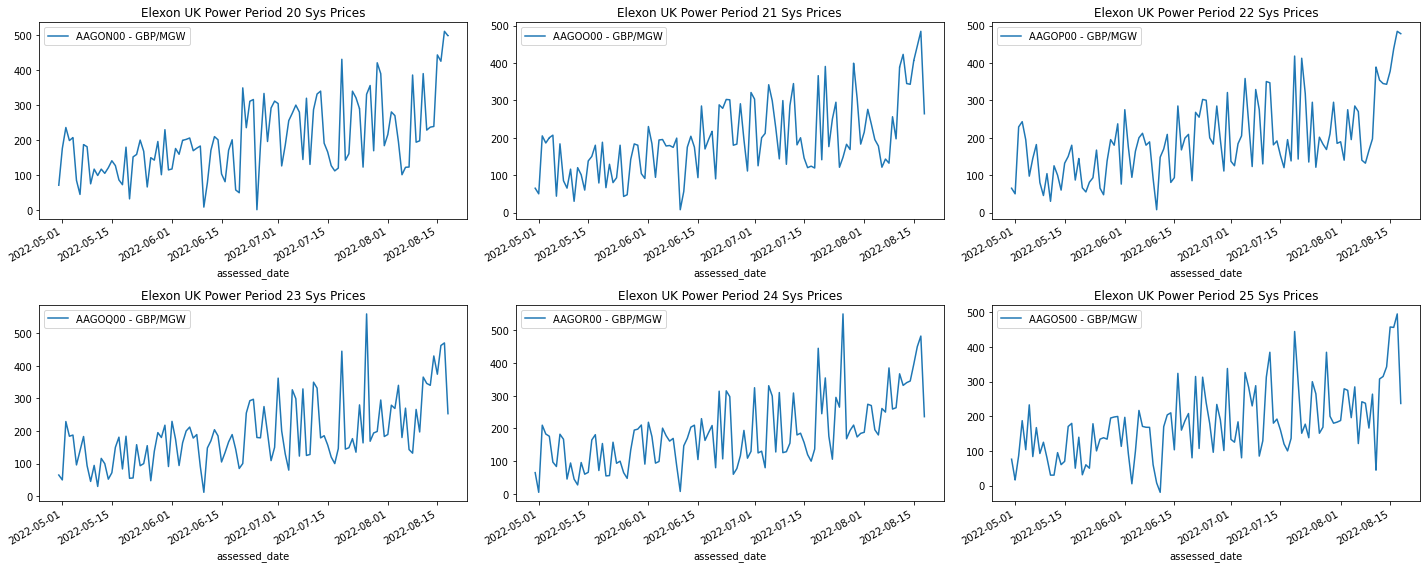

In [94]:
plt.figure(figsize=(20,8))
for i, s in enumerate(symbols):
  filt = df['symbol'] == s
  filt_df = df[filt]

  ax = plt.subplot(2, 3, i+1)
  filt_df.plot(x='assessed_date', y='value', ax=ax)
  ax.set_title(filt_df.iloc[0]['description'])
  ax.legend([f"{s} - {filt_df.iloc[0]['currency']}/{filt_df.iloc[0]['uom']}"])

plt.tight_layout()